In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

from tensorflow.keras.datasets import mnist 

In [2]:
pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Определение классов (цифры от 0 до 9)
class_names = [str(i) for i in range(10)]

In [5]:
# Проверка форм данных
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


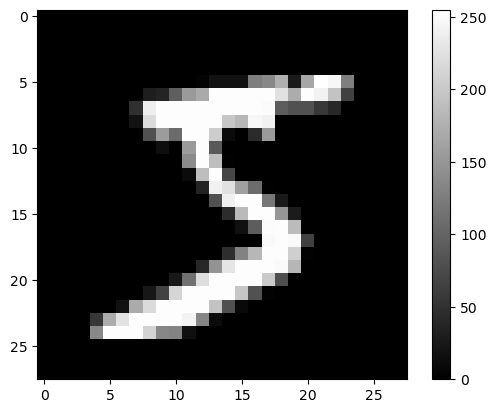

In [6]:
# Визуализация первого изображения
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)

In [7]:
# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

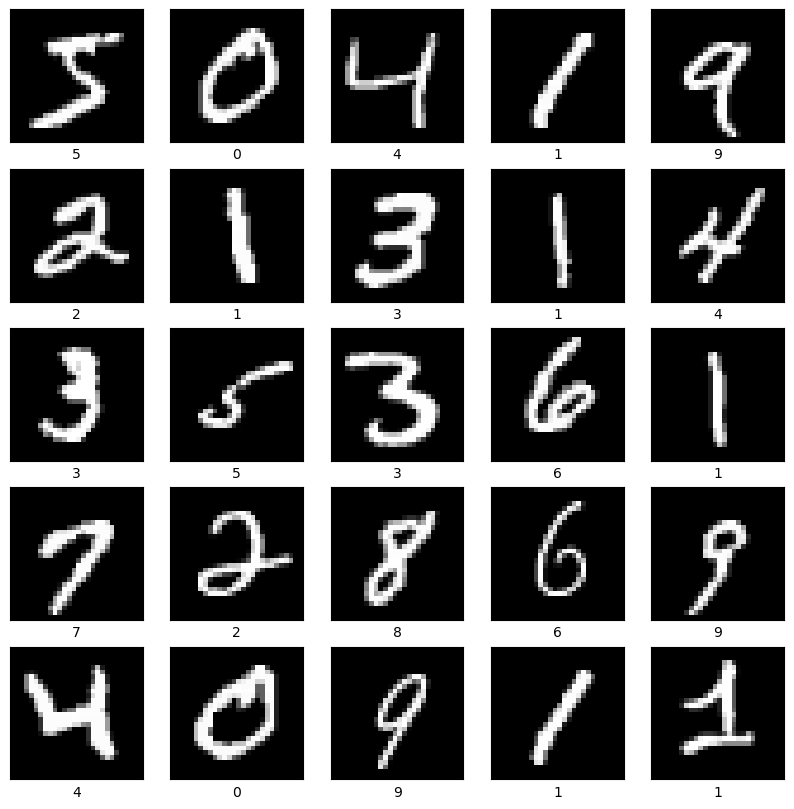

In [8]:
# Визуализация нескольких изображений
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # Увеличение количества нейронов
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
# Обучение модели
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5880 - accuracy: 0.8499
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.9215
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2242 - accuracy: 0.9360
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1901 - accuracy: 0.9453
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1655 - accuracy: 0.9528
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1467 - accuracy: 0.9578
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1320 - accuracy: 0.9621
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1197 - accuracy: 0.9657
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9691
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.100

In [12]:
# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0784 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


In [13]:
# Прогнозирование
predictions = model.predict(x_test)
print(predictions[0])  # Вероятности для первой цифры в тестовом наборе
print(np.argmax(predictions[0]))  # Индекс класса с наибольшей вероятностью
print(y_test[0])  # Истинный класс для первой цифры

313/313 [==============================] - 0s 1ms/step
[1.1425779e-05 1.1914896e-06 1.7077998e-04 3.1649459e-03 4.2316503e-07
 3.1239961e-05 1.2962990e-09 9.9647778e-01 3.1645275e-05 1.1068126e-04]
7
7


Text(0.5, 0, '7')

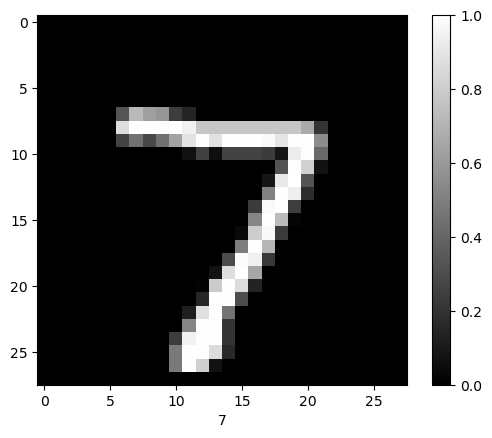

In [14]:
# Визуализация прогноза
plt.figure()
plt.imshow(x_test[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[np.argmax(predictions[0])])  # Предсказанный класс

In [67]:
# Сохранение модели
model.save('mnist_model_numbers.keras')